# HEALTHCARE SYSTEMS

### Business Understanding
Am hired by a Non-governmental organisation to;
1. Develop a model to predict billing amount based on the patient's medical condition, hospital and treatment details.
2. group patients based on age, medical conditions and treatment received to identify patterns in health care needs. 
3. Identify the key factors driving healthcare costs, such as medical condition, type of admission or hospital choice.
4. Investigate how different insuarance providers correlate with medical conditions, billings and outcomes.

## Data Collection


In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('healthcare_dataset.csv')
df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal


In [17]:
#check for missing values
missing_values = df.isnull().sum()
missing_values

Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
dtype: int64

In [18]:
# check for duplicates
duplicates = df.duplicated().sum()
duplicates

534

### Visualisation

#### Billing amount

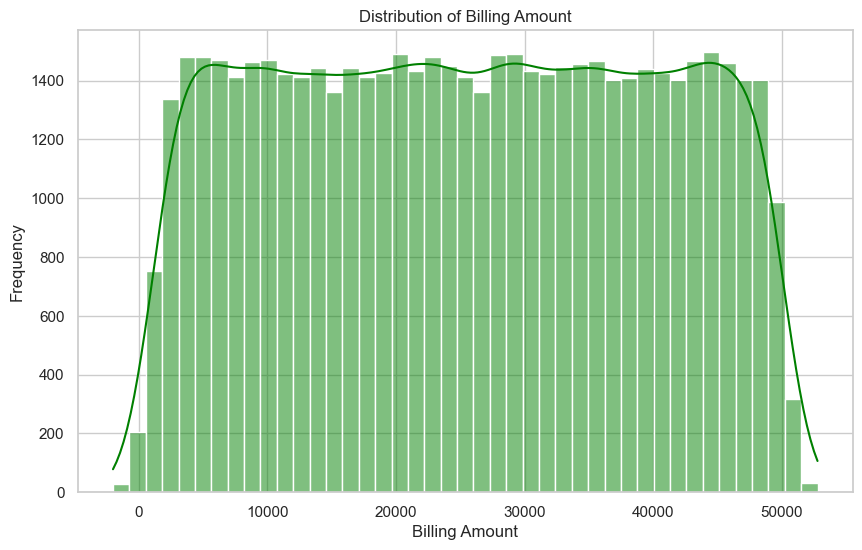

In [19]:
# Plot a histogram to understand the distribution of billing amounts
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.histplot(df['Billing Amount'], kde=True, color='green')
plt.title('Distribution of Billing Amount')
plt.xlabel('Billing Amount')
plt.ylabel('Frequency')
plt.show()

** observation:** Itis evenly distributed. As the billing approaches 50,000, theres a noticeable decrease in frequency, indicating fewer instance of hiher billing amounts.

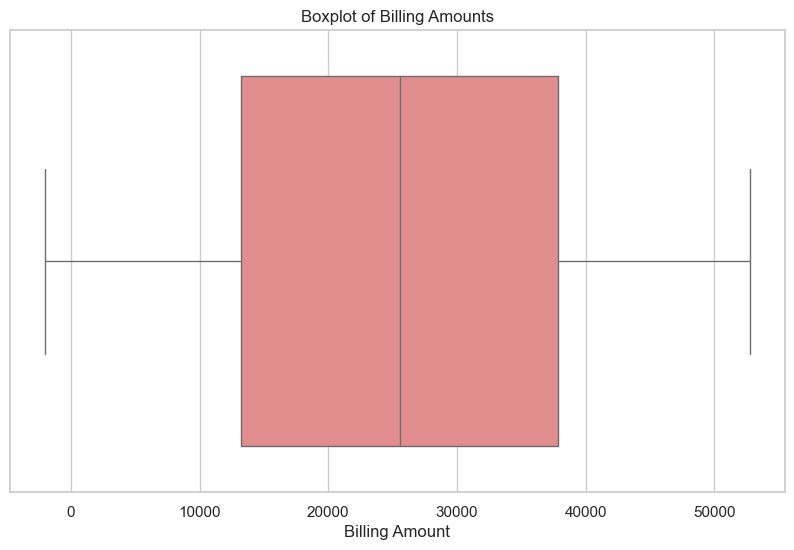

In [23]:
#boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Billing Amount'], color='lightcoral')
plt.title('Boxplot of Billing Amounts')
plt.xlabel('Billing Amount')
plt.show()

1. there's no outliers. All billing amounts fall within the expected range of variability.
2. The median appearsto be centered, suggesting a relatively symmetric distribution

#### Patient Demographics


Text(0, 0.5, 'Frequency')

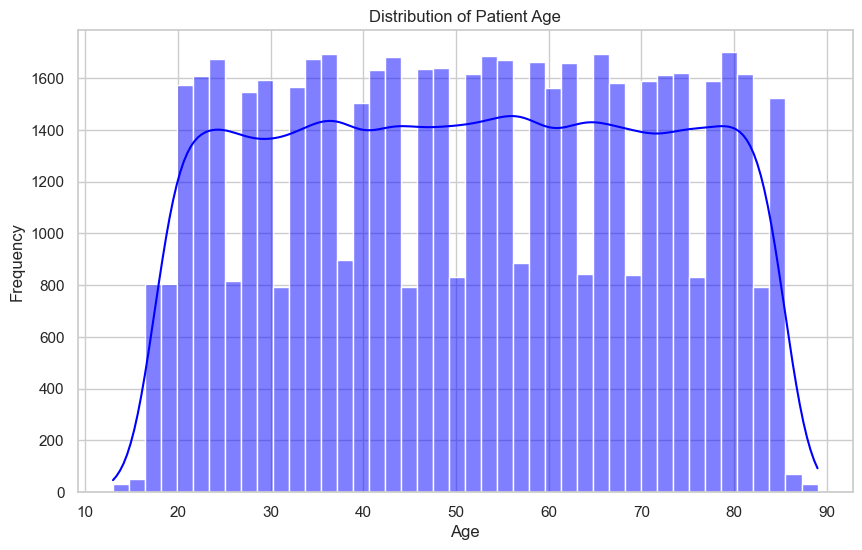

In [24]:
#Age distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], kde=True, color='blue')
plt.title('Distribution of Patient Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

Spread: The histogramshows a wide range of ages, indicating that patients of all ages are represented but with varying frequencies.

Distribution Shape: The line graph suggests a smoothed distribution of ages, showing how the frequency of patients changes across different age groups.

C:\Users\Marijoise\AppData\Local\Temp\ipykernel_11448\488472883.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Gender'], palette='pastel')


Text(0, 0.5, 'Frequency')

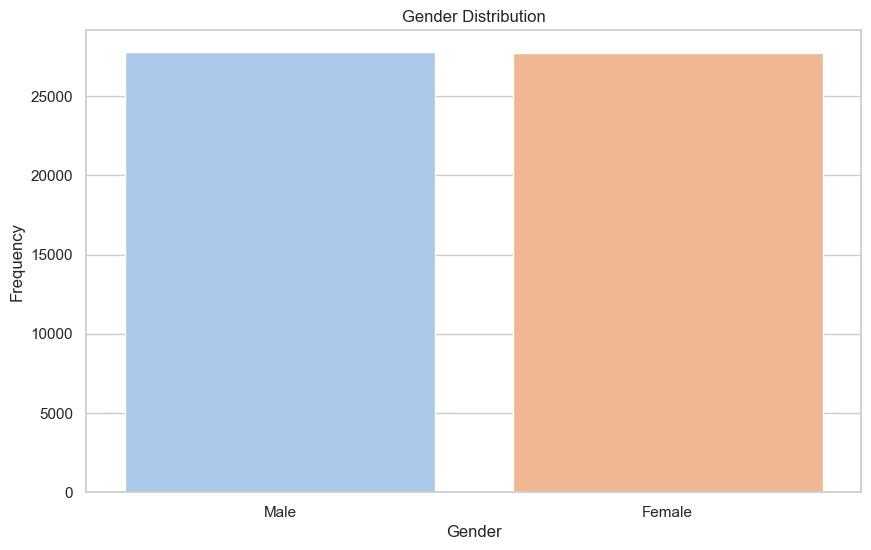

In [29]:
# gender distribution

plt.figure(figsize=(10, 6))
sns.countplot(x=df['Gender'], palette='pastel')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Frequency')

that is an even distribution of gender between male and female patients.

C:\Users\Marijoise\AppData\Local\Temp\ipykernel_11448\4235446397.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Medical Condition', data=df, order=df['Medical Condition'].value_counts().index, palette='viridis')


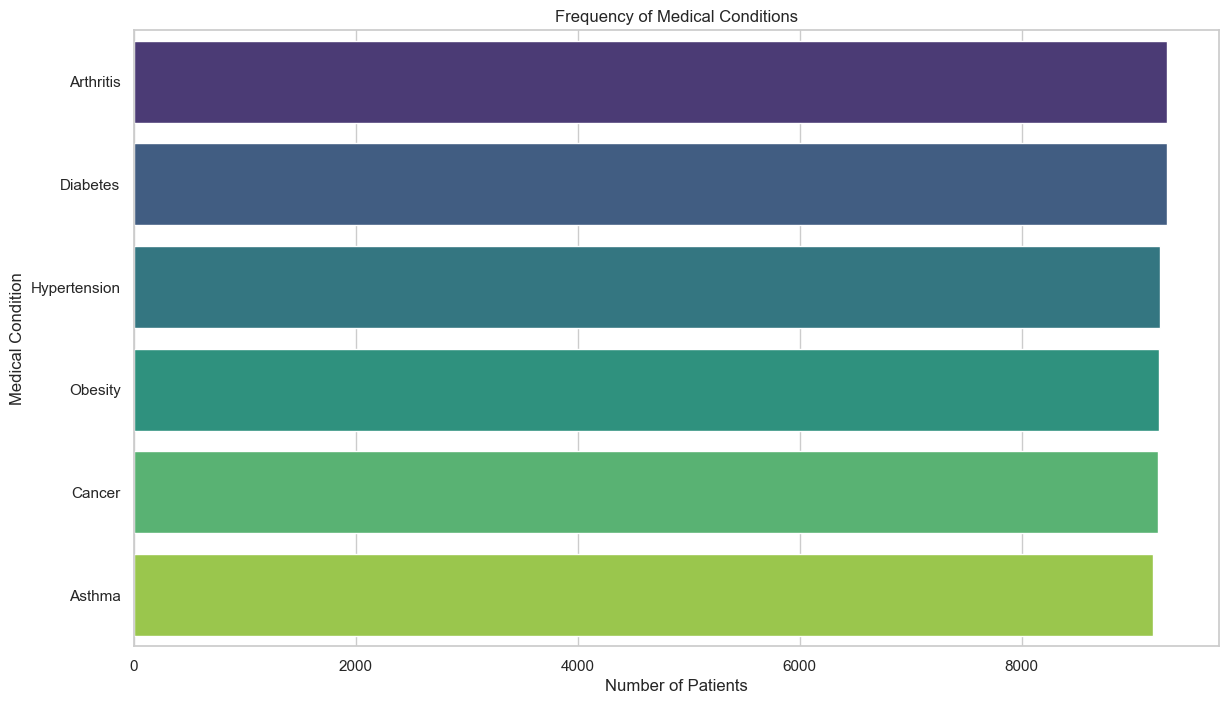

In [28]:
# medical condition frequency
plt.figure(figsize=(14, 8))
sns.countplot(y='Medical Condition', data=df, order=df['Medical Condition'].value_counts().index, palette='viridis')
plt.title('Frequency of common Medical Conditions')
plt.xlabel('Number of Patients')
plt.ylabel('Medical Condition')
plt.show()